# Laura Hoffmann
# DSC 530 Data Exploration and Analysis
# Term Project
## Setup

In [1]:
import os
print(os.getcwd())

import pandas as pd

import thinkstats2
import thinkplot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

C:\Users\laura\Data Exploration and Analysis\ThinkStats2-master\code


### Before reading this CSV file in Jupyter Notebook, I opened it in Excel to check for duplicate values. I checked for entries that matched in all variables and found that there were not any duplicate entries so then I deleted uneccessary coulmns and opened the file here. Once opened here I dropped two more columns I thought I might've used but decided not to. After this I checked for missing values and found that there were a few for the ABV variable so I replaced those missing values with the mean.

In [2]:
beerdata = pd.read_csv("beer_reviews.csv") 
  
beerdata.drop(["beer_name", "brewery_name"], axis = 1, inplace = True)

beerdata.isnull().sum()

review_overall           0
review_aroma             0
review_appearance        0
beer_style               0
review_palate            0
review_taste             0
beer_abv             42818
dtype: int64

In [3]:
beerabv = beerdata.beer_abv
newdata = beerdata.fillna(beerabv.mean())

# Variables
overall = newdata.review_overall
aroma = newdata.review_aroma
appear = newdata.review_appearance
palate = newdata.review_palate
taste = newdata.review_palate
abv = newdata.beer_abv
style = newdata.beer_style

# newdata['beer_style'].value_counts().index.tolist()

# Histograms

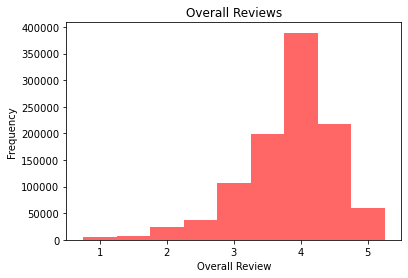

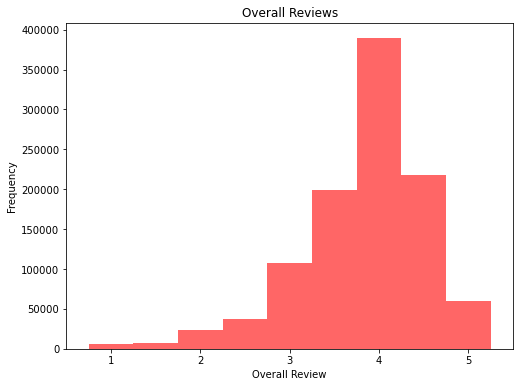

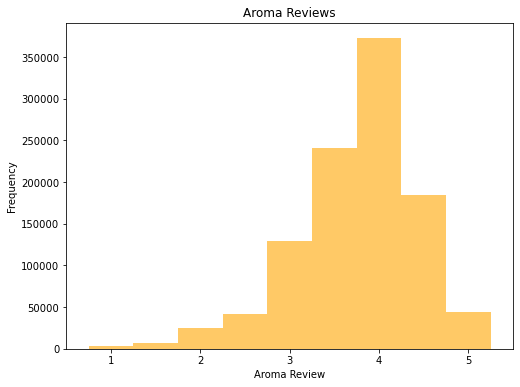

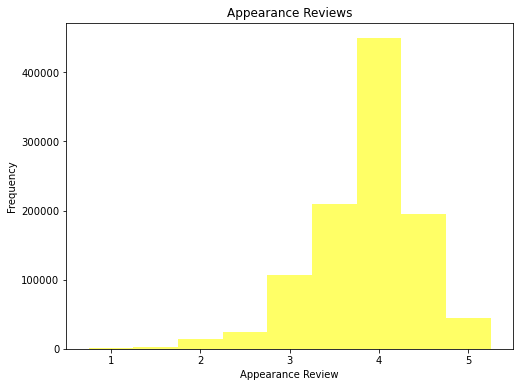

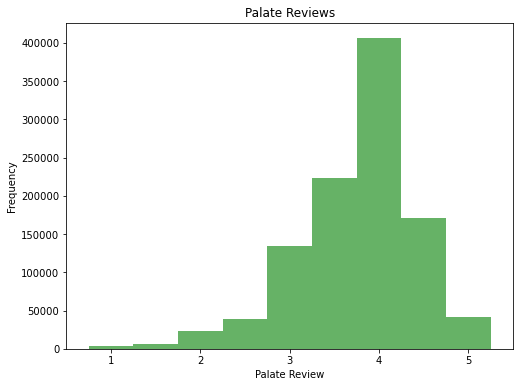

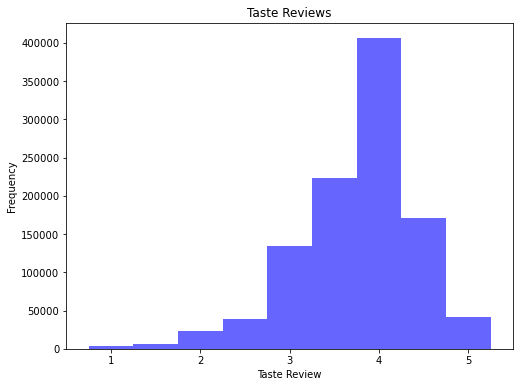

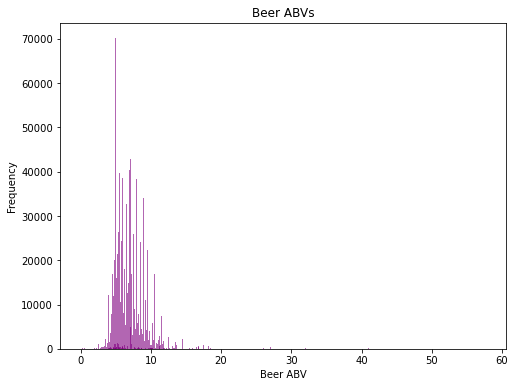

<Figure size 576x432 with 0 Axes>

In [4]:
# Histogram 1, Overall Reviews
hist1 = thinkstats2.Hist(overall)
thinkplot.Hist(hist1, width=.5, color="red")
thinkplot.Show(xlabel="Overall Review", ylabel="Frequency", title="Overall Reviews", xlim=[.5,5.5])

# Histogram 2, Aroma Reviews
hist2 = thinkstats2.Hist(aroma)
thinkplot.Hist(hist2, width=.5, color="orange")
thinkplot.Show(xlabel="Aroma Review", ylabel="Frequency", title="Aroma Reviews", xlim=[.5,5.5])

# Histogram 3, Appearance Reviews
hist3 = thinkstats2.Hist(appear)
thinkplot.Hist(hist3, width=.5, color="yellow")
thinkplot.Show(xlabel="Appearance Review", ylabel="Frequency", title="Appearance Reviews", xlim=[.5,5.5])

# Histogram 4, Palate Reviews
hist4 = thinkstats2.Hist(palate)
thinkplot.Hist(hist4, width=.5, color="green")
thinkplot.Show(xlabel="Palate Review", ylabel="Frequency", title="Palate Reviews", xlim=[.5,5.5])

# Histogram 5, Taste Reviews
hist5 = thinkstats2.Hist(taste)
thinkplot.Hist(hist5, width=.5, color="blue")
thinkplot.Show(xlabel="Taste Review", ylabel="Frequency", title="Taste Reviews", xlim=[.5,5.5])

# Histogram 6, ABVs
hist6 = thinkstats2.Hist(abv)
thinkplot.Hist(hist6, width=.1, color="purple")
thinkplot.Show(xlabel="Beer ABV", ylabel="Frequency", title="Beer ABVs")

### All of the review data is left skewed with tails extending farther to the left than the right, while the ABV data is right skewed and has a much longer tail extedning to the right. This is because for the reviews most of the data falls on the higher end of the spectrum and there are a few points on the lower end. For the ABV data we can see that there are mostly points on the lower end with a mode around 5 and there are a few points that go way higher than that leaving that data visually skewed to the right with a horizontally long (but vertically short) tail since there are only one or two values representing the higher numbers.

#### Some of the data in the ABV histogram is barely visible but there are points going up to 57.7% and a few 43%. These values might've seen like outliers, however after some research on those specific beers I learned those are the correct values. In addition, one of the reasons that the mode is 5 is because there were some datapoints missing the ABV and those were filled in with the mean.

# Statistics

In [5]:
import statistics

def printstats(variable):
    print("Mean:", round(statistics.mean(variable),2))
    print("Mode:", statistics.mode(variable))
    print("Spread:", round(statistics.variance(variable),2))

# Overall Reviews
print("***Overall***")
printstats(overall)

# Aroma Reviews
print("***Aroma***")
printstats(aroma)

# Appearance Reviews
print("***Appearance***")
printstats(appear)

# Palate Reviews
print("***Palate***")
printstats(palate)

# Taste Reviews
print("***Taste***")
printstats(taste)

# ABVs
print("***ABVs***")
printstats(abv)

***Overall***
Mean: 3.83
Mode: 4.0
Spread: 0.5
***Aroma***
Mean: 3.76
Mode: 4.0
Spread: 0.46
***Appearance***
Mean: 3.86
Mode: 4.0
Spread: 0.36
***Palate***
Mean: 3.76
Mode: 4.0
Spread: 0.44
***Taste***
Mean: 3.76
Mode: 4.0
Spread: 0.44
***ABVs***
Mean: 7.07
Mode: 5.0
Spread: 5.15


# Comparing Two Scenarios

### In order to compare two scenarios of the same variable I wanted to compare beer styles to one another. I printed out the list of styles earlier in this file. Following this I wanted to group together similar styles ie. all IPAs or all Stouts and then compare that group to the other styles. 

## Comparing the overall ratings of all IPA style beers to the overall rating of non-IPAs

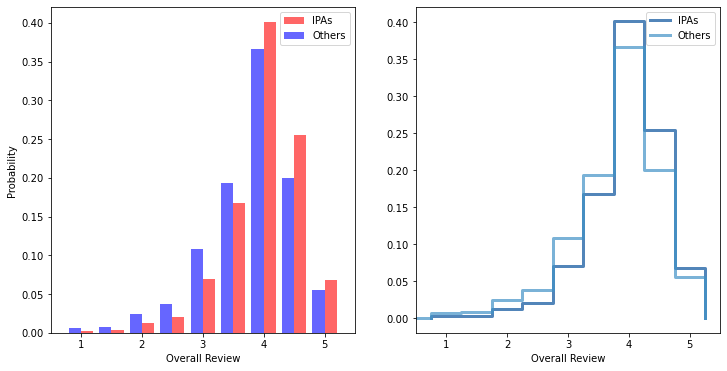

<Figure size 576x432 with 0 Axes>

In [6]:
ipas = newdata[newdata.beer_style.isin(['American IPA', 
                                        'American Double / Imperial IPA', 
                                        'English India Pale Ale (IPA)', 
                                        'Belgian IPA'])]
nonipas = newdata[(newdata['beer_style'] != 'American IPA') & 
                  (newdata['beer_style'] != 'American Double / Imperial IPA') & 
                  (newdata['beer_style'] != 'English India Pale Ale (IPA)') &
                  (newdata['beer_style'] != 'American Double / Imperial IPA')]

ipas_pmf = thinkstats2.Pmf(ipas.review_overall, label='IPAs')
nonipas_pmf = thinkstats2.Pmf(nonipas.review_overall, label='Others')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(ipas_pmf, color='red', align='left', width=.2)
thinkplot.Hist(nonipas_pmf, color='blue', align='right', width=.2)
thinkplot.Config(xlabel='Overall Review', ylabel='Probability', xlim=[.5,5.5])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([ipas_pmf, nonipas_pmf])
thinkplot.Show(xlabel='Overall Review', xlim=[.5,5.5])

## Comparing the overall ratings of all Stout style beers to the overall rating of non-Stouts

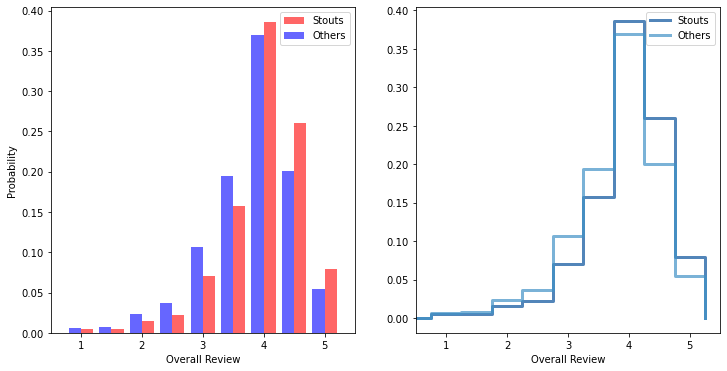

<Figure size 576x432 with 0 Axes>

In [7]:
stouts = newdata[newdata.beer_style.isin(['American Double / Imperial Stout', 
                                        'Russian Imperial Stout', 
                                        'American Stout', 
                                        'Oatmeal Stout',
                                        'Milk / Sweet Stout',
                                        'Irish Dry Stout',
                                        'Foreign / Export Stout',
                                        'English Stout'])]
nonstouts = newdata[(newdata['beer_style'] != 'American Double / Imperial Stout') & 
                    (newdata['beer_style'] != 'Russian Imperial Stout') & 
                    (newdata['beer_style'] != 'American Stout') &
                    (newdata['beer_style'] != 'Oatmeal Stout') &
                    (newdata['beer_style'] != 'Milk / Sweet Stout') &
                    (newdata['beer_style'] != 'Irish Dry Stout') &
                    (newdata['beer_style'] != 'Foreign / Export Stout') &
                    (newdata['beer_style'] != 'English Stout')]

stouts_pmf = thinkstats2.Pmf(stouts.review_overall, label='Stouts')
nonstouts_pmf = thinkstats2.Pmf(nonstouts.review_overall, label='Others')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(stouts_pmf, color='red', align='left', width=.2)
thinkplot.Hist(nonstouts_pmf, color='blue', align='right', width=.2)
thinkplot.Config(xlabel='Overall Review', ylabel='Probability', xlim=[.5,5.5])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([stouts_pmf, nonstouts_pmf])
thinkplot.Show(xlabel='Overall Review', xlim=[.5,5.5])

### For both styles of beer (IPAs and Stouts) we can see that when we compare those categories to every other style collectively, it is expected that the IPA or Stouts will receive the higher scores and that collectively the others are more likely to receive a lower score.

# CDFs

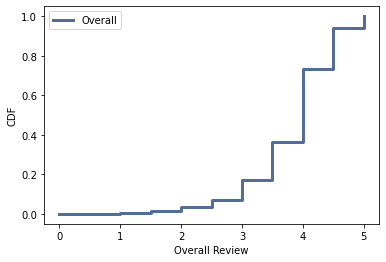

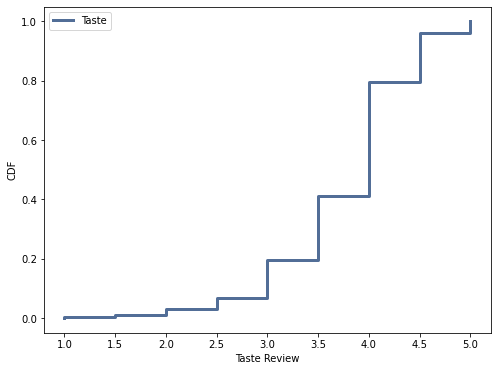

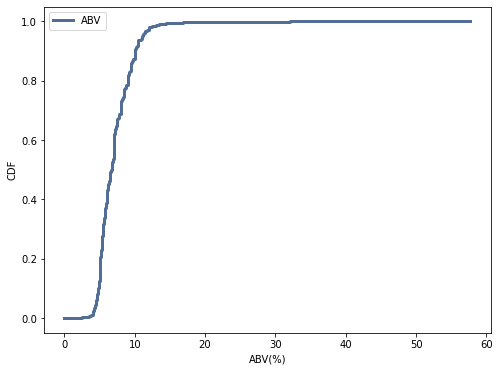

<Figure size 576x432 with 0 Axes>

In [8]:
overallcdf = thinkstats2.Cdf(overall, label="Overall")
thinkplot.Cdf(overallcdf)
thinkplot.Show(xlabel="Overall Review", ylabel="CDF")

tastecdf = thinkstats2.Cdf(taste, label="Taste")
thinkplot.Cdf(tastecdf)
thinkplot.Show(xlabel="Taste Review", ylabel="CDF")

abvcdf = thinkstats2.Cdf(abv, label="ABV")
thinkplot.Cdf(abvcdf)
thinkplot.Show(xlabel="ABV(%)", ylabel="CDF")

### These CDFs show us that for overall, the 4.5 rating is about at the 90th percentile, or a little higher. For taste, the 4.5 rating is at about the 95th percentile. For ABV, 10% is already at the 80th percentile and once we get to 20% ABV we're already at the 99th percentile because there are so few beers with more than 20% ABV. This shows us that it's more difficult to get a higher rating in the Taste variable than it is in the overall variable, so there are definitely other factors impacting the overall score. 

# Analytical Distribution

Mean, Var 7.0080465977517665 4.0375951212504955
Sigma 2.009376799221713


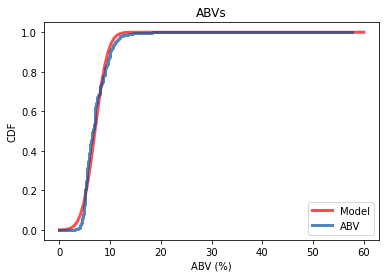

In [9]:
# Normal Model

# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(abv, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=60)

thinkplot.Plot(xs, ps, label='Model', color='red')

thinkplot.PrePlot(1)
thinkplot.Cdf(abvcdf) 
thinkplot.Config(title='ABVs', xlabel='ABV (%)', ylabel='CDF')

### Using some of the code from chapter 5 I was able to plot the normal distribution model with the CDF of ABVs. We can see that it follows the normal curve pretty closely except small discrepancies around 5% and 10% where there are less entries with those values than expected.

# Scatter Plots

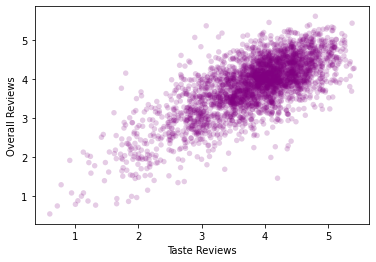

<Figure size 576x432 with 0 Axes>

In [10]:
sample=thinkstats2.SampleRows(newdata, 3000)
soverall=sample.review_overall
joverall=thinkstats2.Jitter(soverall,.2)
staste=sample.review_taste
jtaste=thinkstats2.Jitter(staste,.2)
sabv=sample.beer_abv

thinkplot.Scatter(jtaste, joverall, color='purple')
thinkplot.Show(xlabel='Taste Reviews', ylabel='Overall Reviews')

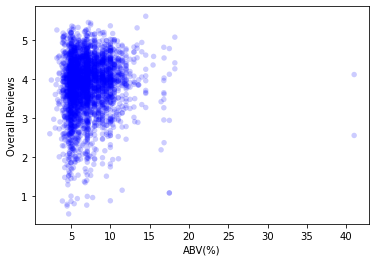

<Figure size 576x432 with 0 Axes>

In [11]:
thinkplot.Scatter(sabv, joverall)
thinkplot.Show(xlabel='ABV(%)', ylabel='Overall Reviews')

### We can see a highly positive relationship between the review on taste and the overall review, which I would imagine to be true for all of the other review variables when paired with overall review in a scatterplot. On the other hand, ABV doesn't seem to have much of a relationship with the overall review. The review scores being correlated is probably also due to causation because if one thinks a beer tastes better (gives it a higher taste review) it would also add to the overall review (giving it a higher overall review). 

# Hypothesis Test (Testing a Correlation)

In [12]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

data = overall.values, taste.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print(pvalue)

ht.actual, ht.MaxTestStat()

0.0


(0.6923576485011802, 0.0031437203358119247)

### The actual correlation is around .7 which means the two variables (review on tase and overall review) are closely correlated. The p-value is 0 and after 1000 iterations the maximum simulated correlation is .003.

# Regression Analysis

In [13]:
import statsmodels.formula.api as smf

formula = 'review_overall ~ review_taste'
model = smf.ols(formula, data=newdata)
results = model.fit()
(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         review_overall   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                 1.676e+06
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:27:32   Log-Likelihood:            -6.2254e+05
No. Observations:             1048575   AIC:                         1.245e+06
Df Residuals:                 1048573   BIC:                         1.245e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8757      0.002    377.124      0.000       0.871       0.880
review_taste     0.7750      0.001   1294.456      0.000       0.774       0.776
==============================================================================
Omnibus:                    44934.428   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127236.970
Skew:                          -0.182   Prob(JB):                         0.00
Kurtosis:                       4.667   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
formula1 = 'review_overall ~ review_appearance + review_aroma + review_palate'
model = smf.ols(formula1, data=newdata)
results1 = model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         review_overall   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                 4.069e+05
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:27:32   Log-Likelihood:            -7.1835e+05
No. Observations:             1048575   AIC:                         1.437e+06
Df Residuals:                 1048571   BIC:                         1.437e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4971      0.003    148.638      0.000       0.491       0.504
review_appearance     0.0799      0.001     81.209      0.000       0.078       0.082
review_aroma          0.2822      0.001    311.056      0.000       0.280       0.284
review_palate         0.5221      0.001    559.412      0.000       0.520       0.524
==============================================================================
Omnibus:                    75293.188   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207289.799
Skew:                          -0.402   Prob(JB):                         0.00
Kurtosis:                       5.024   Cond. No.                         48.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-Squared is a lot higher for taste on the regression analysis than appearance, aroma and palate combined. 
### Adjusted R-squared matches R-squared in both results
### The coefficient is highest for taste

1.0658073942872024 0.7347658019449113


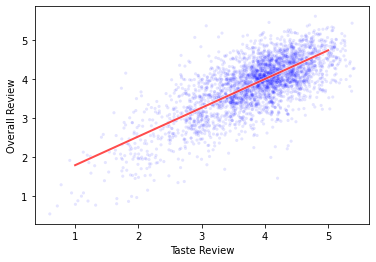

In [15]:
# Linear Least Squares

from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)
    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx
    return inter, slope

inter, slope = LeastSquares(taste, overall)
print(inter, slope)

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

fit_xs, fit_ys = FitLine(taste, inter, slope)

thinkplot.Scatter(jtaste, joverall, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Taste Review",
                 ylabel="Overall Review")

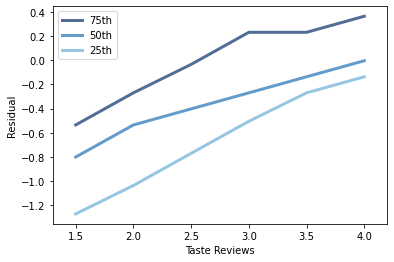

In [16]:
# Residuals

def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

newdata['residual'] = Residuals(taste, overall, inter, slope)

bins = np.arange(0, 5, .5)
indices = np.digitize(newdata.review_taste, bins)
groups = newdata.groupby(indices)

taste_means = [group.review_taste.mean() for _, group in groups][1:-1]
taste_means

cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

def PlotPercentiles(taste_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        overall_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(taste_means, overall_percentiles, label=label)

PlotPercentiles(taste_means, cdfs)
thinkplot.Config(xlabel="Taste Reviews", ylabel="Residual", xlim=[1.3, 4.2])